In [1]:
from PIL import Image
import numpy as np
import torch
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image

/home/hice1/athalanki3/.conda/envs/dl_project/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
palette = [[0,0,0],[255,0,0],[180,120,120],[160,150,20],[140,140,140],[61,230,250],[0,82,255],[255,0,245],[255,235,0],[4,250,7]]

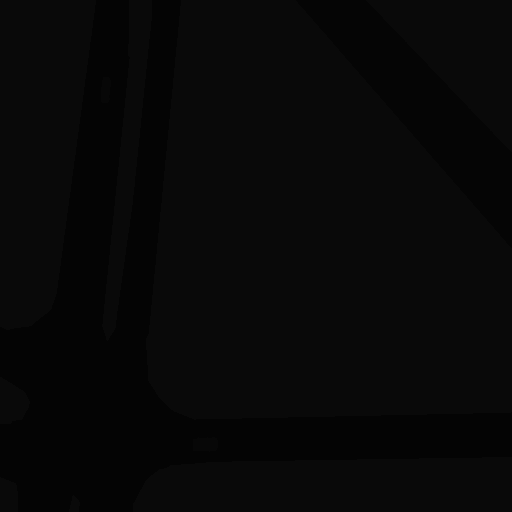

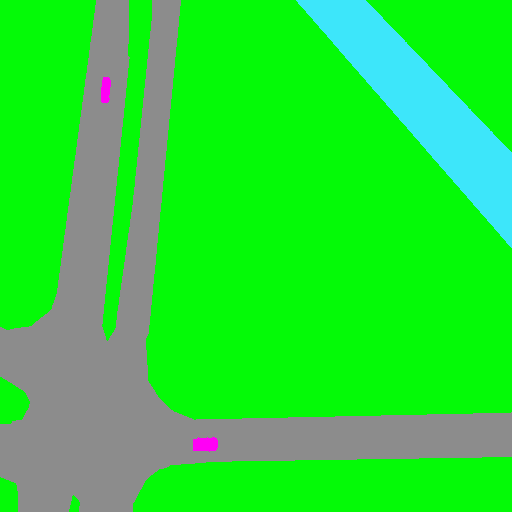

In [3]:
label_img_path = "/home/hice1/athalanki3/scratch/DeepLearningProject/GenerateFloodNet/FloodNet-Supervised_v1.0/test/test-label-img/6336_lab.png"
label_im = Image.open(label_img_path)
display(label_im)
img_array = np.array(label_im)
color_seg = np.zeros_like(img_array)
img_array = np.mean(img_array,axis=-1)
for i, color in enumerate(palette):
    color_seg[img_array == i,:] = color
color_seg = np.uint8(color_seg)
label = Image.fromarray(color_seg)
display(label)

In [4]:
controlnet_model = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-seg",torch_dtype=torch.float32)
pipe = StableDiffusionControlNetPipeline.from_pretrained("runwayml/stable-diffusion-v1-5",controlnet=controlnet_model,safety_checker=None).to("cuda")
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

Loading pipeline components...: 100%|██████████| 6/6 [00:07<00:00,  1.22s/it]
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


100%|██████████| 20/20 [00:01<00:00, 16.50it/s]


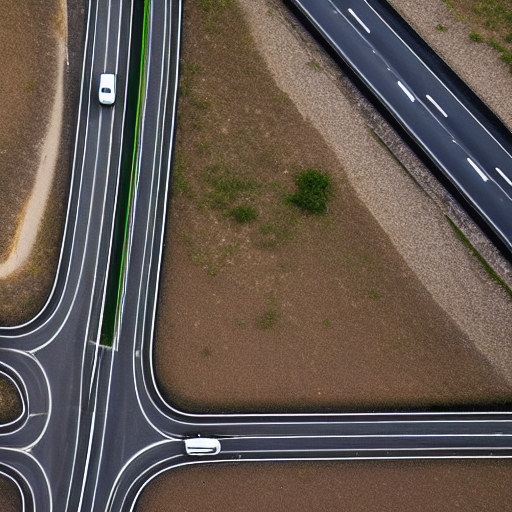

In [19]:
pipe.enable_xformers_memory_efficient_attention()
import torchvision.transforms as transforms
transform = transforms.ToTensor()
img = transform(label).to("cuda")
img = img[None,...]
image = pipe("topdown view of road intersection", img, num_inference_steps=20).images[0]
display(image)